In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
economy_df = pd.read_csv('/content/drive/My Drive/Economy.csv')
decentwork_df = pd.read_csv('/content/drive/My Drive/DecentWork.csv')

merged_df = pd.merge(economy_df, decentwork_df, on='date')

merged_df.head()


,date,leading,coincident,lagging,leading_diffusion,coincident_diffusion,overall_ppi,agriculture_ppi,mining_ppi,manufacturing_ppi,...,p_rate,ep_ratio,u_rate,unemployed_active,unemployed_active_3mo,unemployed_active_6mo,unemployed_active_12mo,unemployed_active_long,unemployed_inactive,u_rate_category
0,2016-01-01,99.3,101.9,100.5,42.9,83.3,99.5,95.8,66.9,103.4,...,67.7,65.4,3.4,361.9,180.3,110.0,36.0,35.6,139.7,Medium
1,2016-02-01,98.7,102.0,101.0,71.4,66.7,99.6,99.0,69.7,102.8,...,67.6,65.2,3.4,254.0,115.8,83.7,34.9,19.6,252.4,Medium
2,2016-03-01,99.0,101.8,100.7,57.1,83.3,99.7,102.9,69.1,102.7,...,67.9,65.5,3.5,332.8,176.8,92.9,44.8,18.3,176.7,Medium
3,2016-04-01,98.2,101.4,100.5,28.6,66.7,100.2,105.8,69.1,103.0,...,67.7,65.3,3.5,328.0,170.6,93.3,43.9,20.2,183.4,Medium
4,2016-05-01,98.8,101.3,100.5,57.1,50.0,99.5,105.9,72.8,101.7,...,67.7,65.4,3.4,297.3,153.6,92.5,37.6,13.6,207.6,Medium


In [ ]:
decentwork_selected = decentwork_df[['date', 'u_rate', 'u_rate_category']]

# Merge the selected columns
ml_merged_df = pd.merge(economy_df, decentwork_selected, on='date')

ml_merged_df.head()


,date,leading,coincident,lagging,leading_diffusion,coincident_diffusion,overall_ppi,agriculture_ppi,mining_ppi,manufacturing_ppi,...,Transport_cpi,Information & Communication_cpi,"Recreation, Sport & Culture_cpi",Education_cpi,Restaurant & Accommodation Services_cpi,Insurance & Financial Services_cpi,"Personal Care, Social Protection & Miscellaneous Goods & Services_cpi",overall_cpi,u_rate,u_rate_category
0,2016-01-01,99.3,101.9,100.5,42.9,83.3,99.5,95.8,66.9,103.4,...,104.8,98.1,107.7,114.0,123.9,110.6,112.0,114.5,3.4,Medium
1,2016-02-01,98.7,102.0,101.0,71.4,66.7,99.6,99.0,69.7,102.8,...,101.5,98.1,108.2,114.5,124.4,110.6,112.3,114.5,3.4,Medium
2,2016-03-01,99.0,101.8,100.7,57.1,83.3,99.7,102.9,69.1,102.7,...,97.1,98.1,108.2,114.7,124.6,110.6,112.5,113.8,3.5,Medium
3,2016-04-01,98.2,101.4,100.5,28.6,66.7,100.2,105.8,69.1,103.0,...,100.3,98.1,108.2,114.8,124.7,111.2,112.5,114.3,3.5,Medium
4,2016-05-01,98.8,101.3,100.5,57.1,50.0,99.5,105.9,72.8,101.7,...,100.3,98.1,108.3,114.8,125.0,111.4,112.7,114.6,3.4,Medium


In [ ]:
ml_merged_df

,date,leading,coincident,lagging,leading_diffusion,coincident_diffusion,overall_ppi,agriculture_ppi,mining_ppi,manufacturing_ppi,...,Transport_cpi,Information & Communication_cpi,"Recreation, Sport & Culture_cpi",Education_cpi,Restaurant & Accommodation Services_cpi,Insurance & Financial Services_cpi,"Personal Care, Social Protection & Miscellaneous Goods & Services_cpi",overall_cpi,u_rate,u_rate_category
0,2016-01-01,99.3,101.9,100.5,42.900000,83.300000,99.5,95.8,66.9,103.4,...,104.8,98.1,107.7,114.0,123.9,110.6,112.0,114.5,3.4,Medium
1,2016-02-01,98.7,102.0,101.0,71.400000,66.700000,99.6,99.0,69.7,102.8,...,101.5,98.1,108.2,114.5,124.4,110.6,112.3,114.5,3.4,Medium
2,2016-03-01,99.0,101.8,100.7,57.100000,83.300000,99.7,102.9,69.1,102.7,...,97.1,98.1,108.2,114.7,124.6,110.6,112.5,113.8,3.5,Medium
3,2016-04-01,98.2,101.4,100.5,28.600000,66.700000,100.2,105.8,69.1,103.0,...,100.3,98.1,108.2,114.8,124.7,111.2,112.5,114.3,3.5,Medium
4,2016-05-01,98.8,101.3,100.5,57.100000,50.000000,99.5,105.9,72.8,101.7,...,100.3,98.1,108.3,114.8,125.0,111.4,112.7,114.6,3.4,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-10-01,109.5,124.3,143.0,71.428571,83.333333,119.0,121.6,103.9,120.7,...,120.8,93.9,117.2,125.3,148.8,110.2,122.3,130.9,3.4,Medium
94,2023-11-01,109.9,124.1,143.2,57.142857,66.666667,118.2,123.2,99.0,120.1,...,120.9,93.9,117.3,125.3,149.0,110.2,122.8,130.9,3.3,Low
95,2023-12-01,110.2,123.9,143.7,42.857143,66.666667,118.0,123.2,97.4,120.0,...,121.3,93.8,117.8,125.3,149.2,110.2,123.1,131.2,3.3,Low
96,2024-01-01,112.0,124.1,144.3,57.142857,50.000000,117.9,125.7,96.7,119.8,...,121.2,93.8,117.8,125.5,149.1,110.2,123.2,131.4,3.3,Low


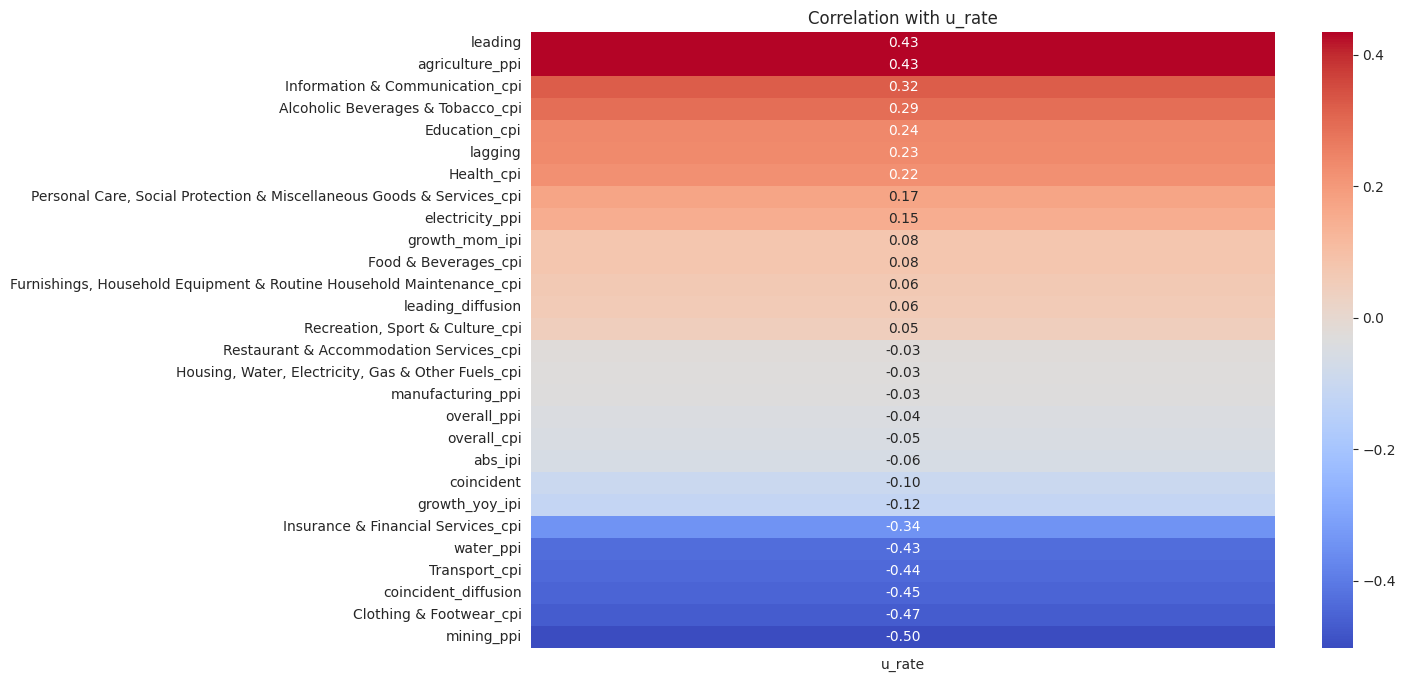

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = ml_merged_df.drop(['u_rate_category','date'],axis=1).corr()
target_corr = corr['u_rate'].drop('u_rate')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with u_rate')
plt.show()

In [ ]:
# Calculate the correlation matrix
corr = ml_merged_df.drop(['u_rate_category', 'date'], axis=1).corr()

# Get the correlation values with the target column
target_corr = corr['u_rate'].drop('u_rate')

# Sort the absolute correlation values in descending order and take the top 10
top_10_corr = target_corr.abs().sort_values(ascending=False).head(10)

# Display the top 10 features with highest correlation with 'u_rate'
top_10_corr = target_corr.loc[top_10_corr.index]
print(top_10_corr)



mining_ppi                           -0.502583
Clothing & Footwear_cpi              -0.466022
coincident_diffusion                 -0.447883
Transport_cpi                        -0.437824
leading                               0.433897
agriculture_ppi                       0.433440
water_ppi                            -0.430535
Insurance & Financial Services_cpi   -0.343587
Information & Communication_cpi       0.321339
Alcoholic Beverages & Tobacco_cpi     0.289802
Name: u_rate, dtype: float64


In [ ]:
# Load the dataset
data = ml_merged_df

# Convert 'date' to datetime format and extract time-related features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Encode categorical variables (if any)
label_encoder = LabelEncoder()
data['u_rate_category'] = label_encoder.fit_transform(data['u_rate_category'])

# Define features and target variable
features = ['mining_ppi','Clothing & Footwear_cpi','coincident_diffusion','Transport_cpi','leading','agriculture_ppi', 'water_ppi','Insurance & Financial Services_cpi','Information & Communication_cpi','Alcoholic Beverages & Tobacco_cpi', 'year','month']
target = 'u_rate'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()

In [ ]:
show = data[['mining_ppi','Clothing & Footwear_cpi','coincident_diffusion','Transport_cpi','leading','agriculture_ppi', 'water_ppi','Insurance & Financial Services_cpi','Information & Communication_cpi','Alcoholic Beverages & Tobacco_cpi', 'year','month','u_rate','u_rate_category']]
show

,mining_ppi,Clothing & Footwear_cpi,coincident_diffusion,Transport_cpi,leading,agriculture_ppi,water_ppi,Insurance & Financial Services_cpi,Information & Communication_cpi,Alcoholic Beverages & Tobacco_cpi,year,month,u_rate,u_rate_category
0,66.9,99.0,83.300000,104.8,99.3,95.8,113.0,110.6,98.1,165.0,2016,1,3.4,2
1,69.7,98.7,66.700000,101.5,98.7,99.0,112.9,110.6,98.1,165.0,2016,2,3.4,2
2,69.1,98.6,83.300000,97.1,99.0,102.9,112.8,110.6,98.1,165.1,2016,3,3.5,2
3,69.1,98.7,66.700000,100.3,98.2,105.8,115.2,111.2,98.1,165.1,2016,4,3.5,2
4,72.8,98.6,50.000000,100.3,98.8,105.9,114.2,111.4,98.1,165.3,2016,5,3.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,103.9,93.4,83.333333,120.8,109.5,121.6,118.6,110.2,93.9,171.7,2023,10,3.4,2
94,99.0,93.4,66.666667,120.9,109.9,123.2,118.8,110.2,93.9,171.8,2023,11,3.3,1
95,97.4,93.4,66.666667,121.3,110.2,123.2,118.3,110.2,93.8,171.6,2023,12,3.3,1
96,96.7,93.3,50.000000,121.2,112.0,125.7,118.7,110.2,93.8,171.5,2024,1,3.3,1


Epoch 1/100
5/5 - 7s - loss: 0.1167 - val_loss: 0.0249 - 7s/epoch - 1s/step
Epoch 2/100
5/5 - 0s - loss: 0.0900 - val_loss: 0.0711 - 96ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0975 - val_loss: 0.0911 - 96ms/epoch - 19ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0788 - val_loss: 0.0823 - 94ms/epoch - 19ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0626 - val_loss: 0.0888 - 95ms/epoch - 19ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0399 - val_loss: 0.1511 - 91ms/epoch - 18ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0337 - val_loss: 0.1233 - 86ms/epoch - 17ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0380 - val_loss: 0.0941 - 94ms/epoch - 19ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0253 - val_loss: 0.1601 - 101ms/epoch - 20ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0276 - val_loss: 0.1086 - 94ms/epoch - 19ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0283 - val_loss: 0.0864 - 90ms/epoch - 18ms/step
1/1 [==============================] - 0s 25ms/step
RMSE: 0.3317031191336655
R² Score: -0.23742843274299408


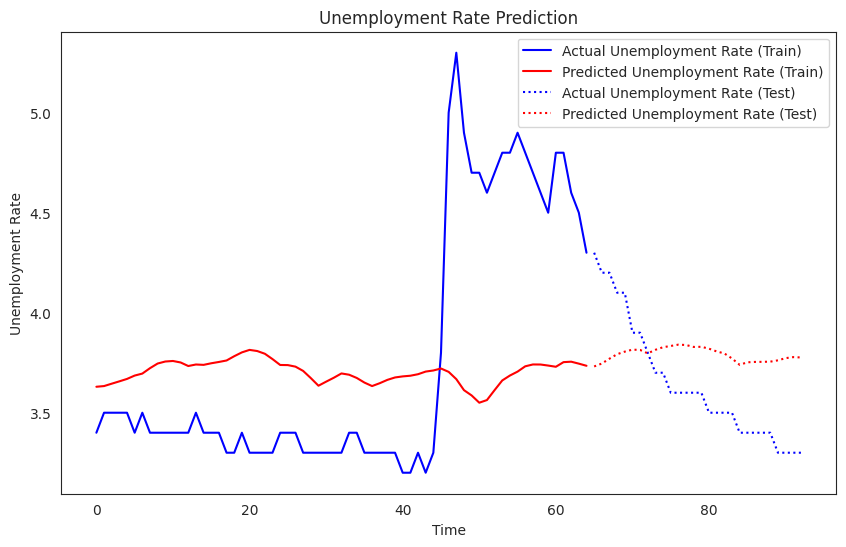

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping


X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Create sequences with lookback
def create_sequences(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:(i + lookback)])
        ys.append(y[i + lookback])
    return np.array(Xs), np.array(ys)

lookback = 5
X_seq, y_seq = create_sequences(X_scaled, y_scaled, lookback)

# Split the data into training and testing sets
split_ratio = 0.7
split = int(X_seq.shape[0] * split_ratio)
X_train_lstm, X_test_lstm = X_seq[:split], X_seq[split:]
y_train_lstm, y_test_lstm = y_seq[:split], y_seq[split:]

# LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(lookback, X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=16, validation_data=(X_test_lstm, y_test_lstm), verbose=2, shuffle=False, callbacks=[early_stopping])

# Plot predictions
train_predictions = model.predict(X_train_lstm)
test_predictions = model.predict(X_test_lstm)

# Reverse scaling
train_predictions_rescaled = scaler.inverse_transform(train_predictions)
y_train_rescaled = scaler.inverse_transform(y_train_lstm)
test_predictions_rescaled = scaler.inverse_transform(test_predictions)
y_test_rescaled = scaler.inverse_transform(y_test_lstm)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, test_predictions_rescaled))
print(f"RMSE: {rmse}")

# Calculate R² score
r2 = r2_score(y_test_rescaled, test_predictions_rescaled)
print(f"R² Score: {r2}")

plt.figure(figsize=(10, 6))
plt.plot(y_train_rescaled, label='Actual Unemployment Rate (Train)', color='blue')
plt.plot(train_predictions_rescaled, label='Predicted Unemployment Rate (Train)', color='red')
plt.plot(range(len(y_train_rescaled), len(y_train_rescaled) + len(y_test_rescaled)), y_test_rescaled, label='Actual Unemployment Rate (Test)', color='blue', linestyle='dotted')
plt.plot(range(len(y_train_rescaled), len(y_train_rescaled) + len(y_test_rescaled)), test_predictions_rescaled, label='Predicted Unemployment Rate (Test)', color='red', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.title('Unemployment Rate Prediction')
plt.show()


Epoch 1/50
4/4 [==============================] - 8s 404ms/step - loss: 0.1556 - val_loss: 0.0153
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1362 - val_loss: 0.0087
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1148 - val_loss: 0.0037
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0875 - val_loss: 0.0038
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0641 - val_loss: 0.0156
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0483 - val_loss: 0.0359
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0489 - val_loss: 0.0442
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0464 - val_loss: 0.0350
Epoch 9/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0374 - val_loss: 0.0188
Epoch 10/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0286 - val_loss: 0.0100
Epoch 11/50
4/4 [===========

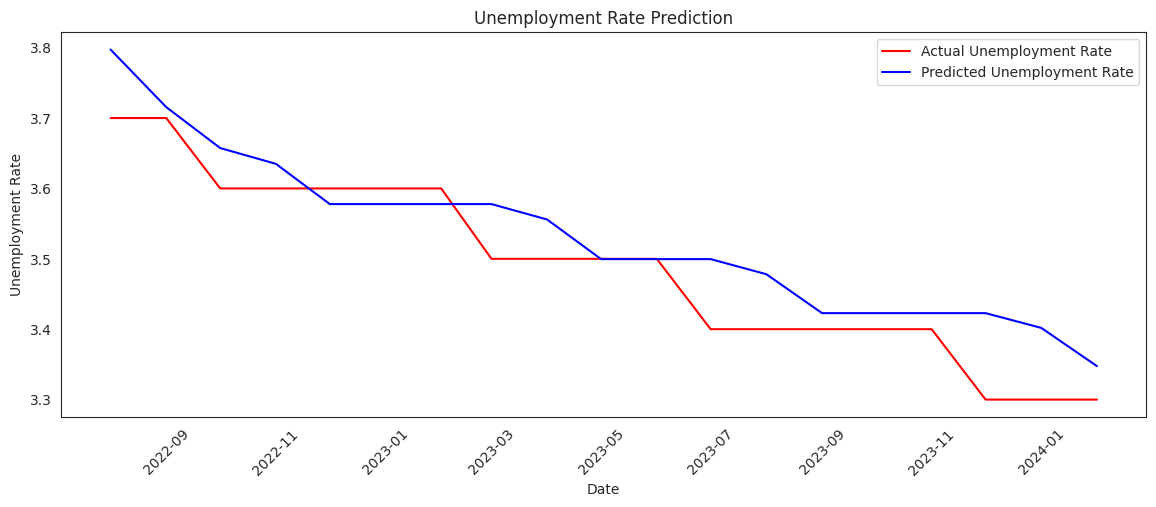

1/1 [==============================] - 0s 22ms/step


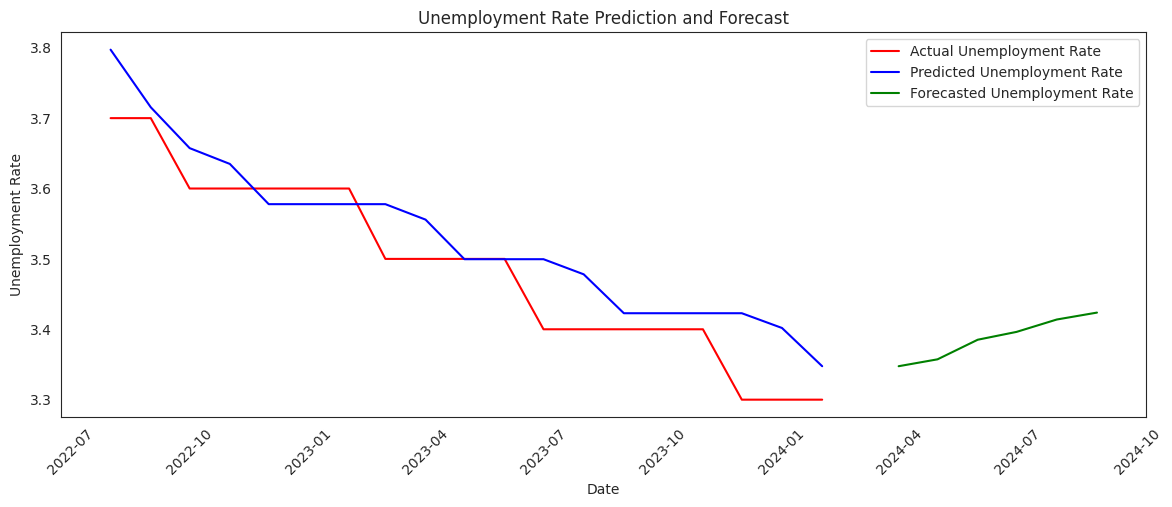

Forecasted Unemployment Rates for the next 6 months: [3.3475258 3.3573227 3.3851573 3.3963103 3.4138827 3.4237063]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded and has 'date' and 'u_rate' columns

# Select relevant columns for forecasting
forecast_data = data[['date', 'u_rate']]
forecast_data.set_index('date', inplace=True)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(forecast_data)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 2
X_forecast, y_forecast = create_dataset(data_scaled, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_forecast = X_forecast.reshape(X_forecast.shape[0], X_forecast.shape[1], 1)

# Split the data into train and test sets
X_forecast_train, X_forecast_test, y_forecast_train, y_forecast_test = train_test_split(X_forecast, y_forecast, test_size=0.2, shuffle=False)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_forecast_train, y_forecast_train, epochs=50, batch_size=24, validation_data=(X_forecast_test, y_forecast_test), verbose=1)

# Evaluate the Model
y_pred = model.predict(X_forecast_test)
y_forecast_test = y_forecast_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Inverse transform to get the actual values
y_test_inv = scaler.inverse_transform(y_forecast_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(y_test_inv - y_pred_inv)))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R² Score: {r2}")

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(forecast_data.index[-len(y_test_inv):], y_test_inv, color='red', label='Actual Unemployment Rate')
plt.plot(forecast_data.index[-len(y_pred_inv):], y_pred_inv, color='blue', label='Predicted Unemployment Rate')
plt.title('Unemployment Rate Prediction')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Forecast future values
future_steps = 6
last_steps = data_scaled[-time_step:]

# Initialize a list to hold the forecasted values
future_forecast = []

# Forecast iteratively for the next 6 months
for _ in range(future_steps):
    last_steps = last_steps.reshape(1, time_step, 1)
    predicted_step = model.predict(last_steps)
    future_forecast.append(predicted_step[0][0])
    last_steps = np.append(last_steps[:, 1:, :], predicted_step.reshape(1, 1, 1), axis=1)

# Inverse transform the forecasted values
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Generate future dates
last_date = forecast_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Plot the forecasted future values
plt.figure(figsize=(14,5))
plt.plot(forecast_data.index[-len(y_test_inv):], y_test_inv, color='red', label='Actual Unemployment Rate')
plt.plot(forecast_data.index[-len(y_pred_inv):], y_pred_inv, color='blue', label='Predicted Unemployment Rate')
plt.plot(future_dates, future_forecast, color='green', label='Forecasted Unemployment Rate')
plt.title('Unemployment Rate Prediction and Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()

print(f"Forecasted Unemployment Rates for the next 6 months: {future_forecast.flatten()}")


RMSE: 0.19252026068654704
R² Score: 0.8214258795645909
                                    Coefficient
mining_ppi                            -0.013734
Clothing & Footwear_cpi               -0.097805
coincident_diffusion                  -0.003138
Transport_cpi                         -0.015813
leading                                0.044411
agriculture_ppi                        0.006655
water_ppi                             -0.096991
Insurance & Financial Services_cpi     0.137691
Information & Communication_cpi       -0.015415
Alcoholic Beverages & Tobacco_cpi     -0.231045
year                                   0.192895
month                                  0.022734


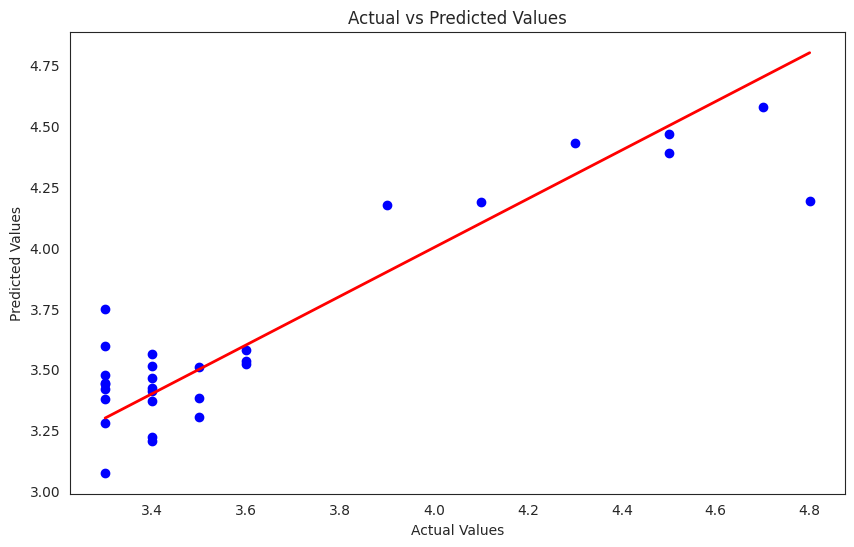

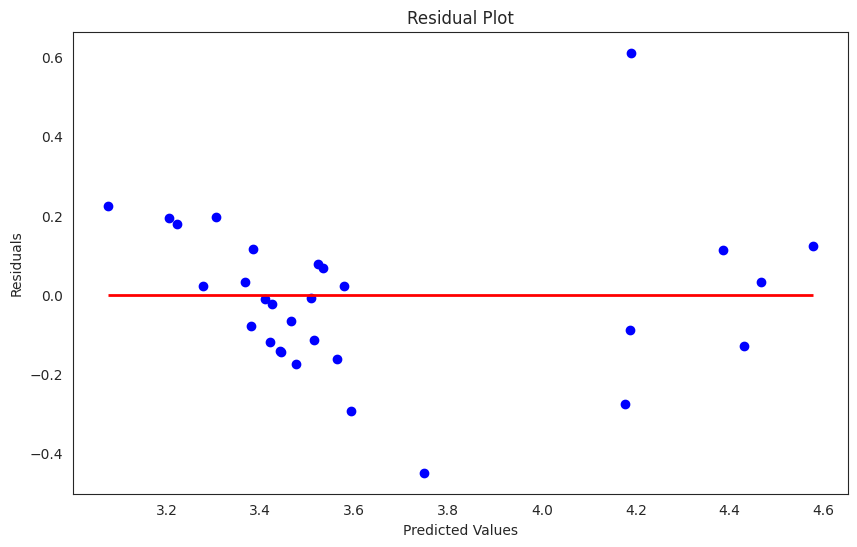

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Optionally, display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
pip install shap

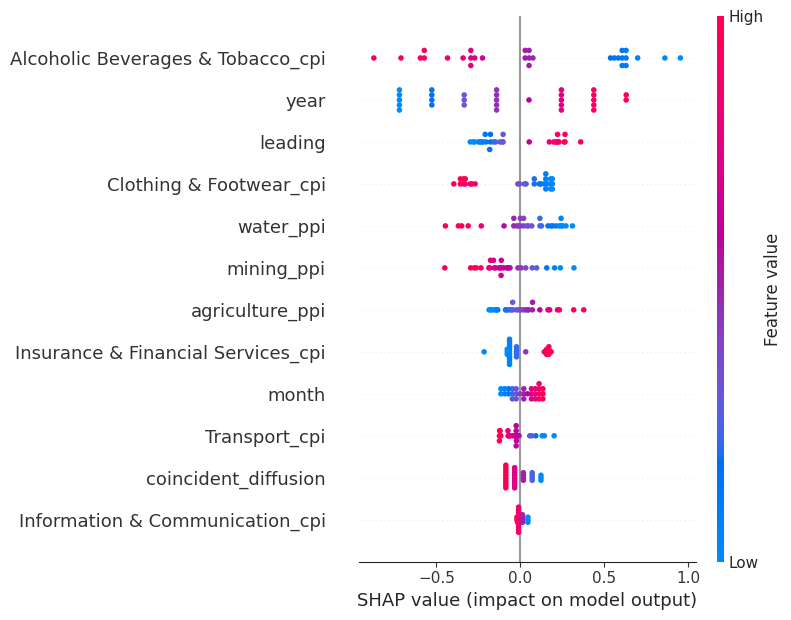

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=features)

RMSE: 0.07598891922385868
R² Score: 0.9721794204479169


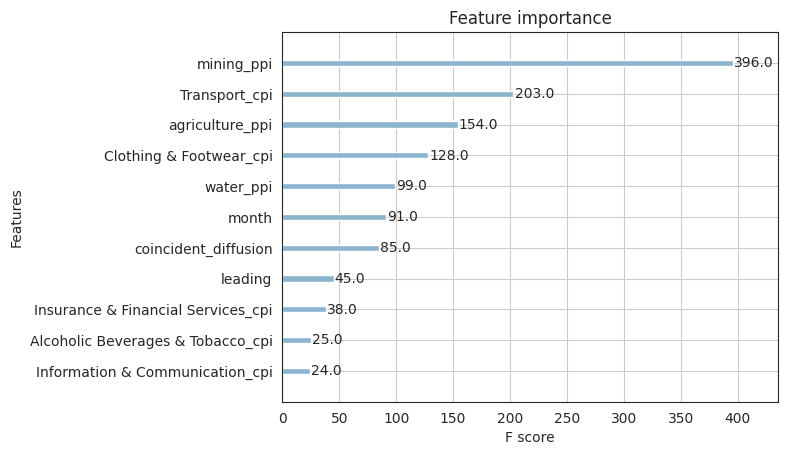

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f'R² Score: {r2}')

xgb.plot_importance(model)
plt.show()


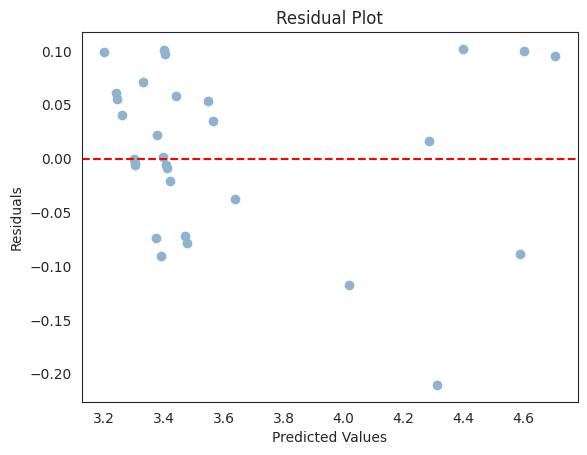

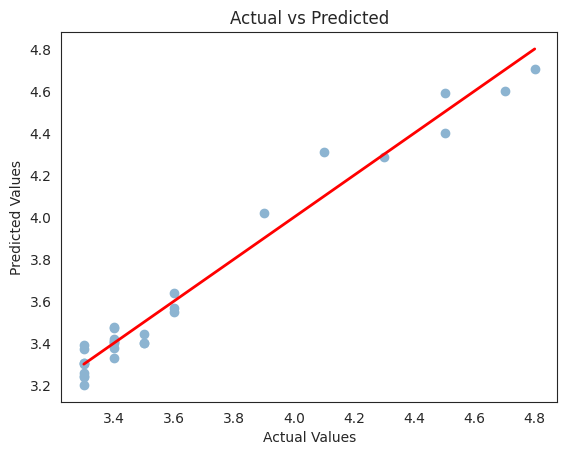

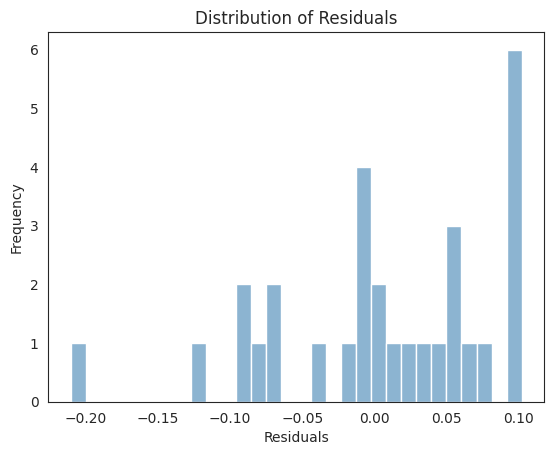

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

# Distribution of Errors
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:

# data = data.sort_values('date')

# # Create lag features
# data['lag_1'] = data['u_rate'].shift(1)
# data['lag_2'] = data['u_rate'].shift(2)
# data['lag_3'] = data['u_rate'].shift(3)

# # Drop rows with NaN values created by lagging
# data = data.dropna()

# # Time series split for training and testing
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Initialize and train the XGBoost regressor
#     model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     print(f"Root Mean Squared Error: {rmse}")
#     r2 = r2_score(y_test, y_pred)
#     print(f'R² Score: {r2}')


# xgb.plot_importance(model)
# plt.show()


Classification

              precision    recall  f1-score   support

         Low       1.00      0.94      0.97        17
      Medium       1.00      0.92      0.96        13
        High       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.96        44



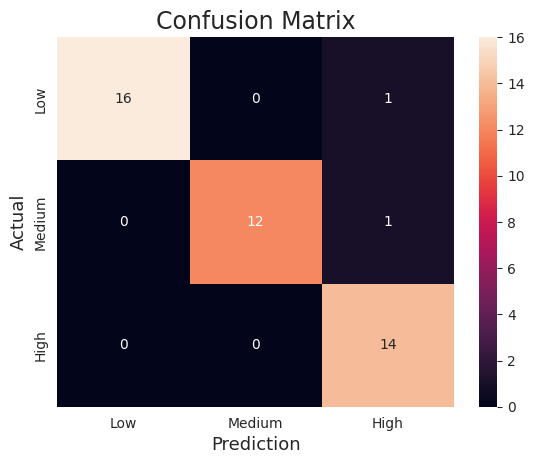

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


le = LabelEncoder()
data['u_rate_category'] = le.fit_transform(data['u_rate_category'])

# Define features and target
features = ['mining_ppi','Clothing & Footwear_cpi','coincident_diffusion','Transport_cpi','leading','agriculture_ppi', 'water_ppi','Insurance & Financial Services_cpi','Information & Communication_cpi','Alcoholic Beverages & Tobacco_cpi', 'year','month']
X=data[features]
y = data['u_rate_category']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Define class names as strings
class_names = ['Low', 'Medium', 'High']

print(classification_report(y_test, y_pred, target_names=class_names))


cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        17
      Medium       1.00      0.69      0.82        13
        High       0.78      1.00      0.88        14

    accuracy                           0.91        44
   macro avg       0.93      0.90      0.90        44
weighted avg       0.93      0.91      0.91        44



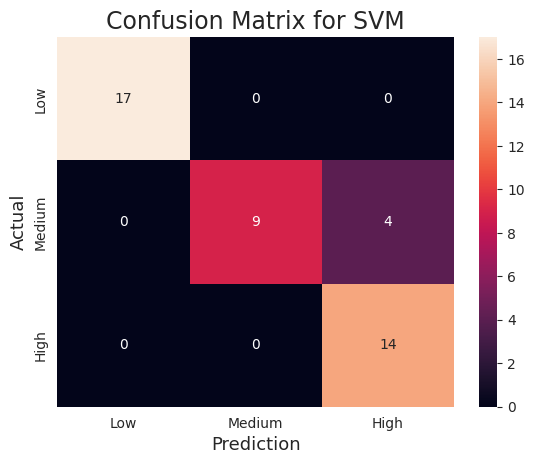

In [ ]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)

# Define class names as strings
class_names = ['Low', 'Medium', 'High']

print(classification_report(y_test, y_pred_svm, target_names=class_names))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm,
            annot=True,
            fmt='g',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix for SVM', fontsize=17)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

# Create a pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Perform 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", scores.mean())

Cross-Validation Scores:  [0.8        0.75       0.6        0.52631579 0.63157895]
Mean Cross-Validation Score:  0.6615789473684209
